In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates
import datetime
from collections import defaultdict

## Compare S-gene to RBD to non-S

In [2]:
full_pred, rbd_mutations, rbd_pred, rbd_coef, S_mutations, S_pred, \
rbd_features, clades, clade_to_lineage = pickle.load(open('rbd_data.pkl', 'rb'))

full_pred = 0.01 * full_pred
rbd_pred = 0.01 * rbd_pred
S_pred = 0.01 * S_pred

missing_clade = 'fine.521.0...1284.0.32.219.3.50.116'

mask = []
for clade in clades:
    if clade == missing_clade:
        mask.append(0)
    else:
        mask.append(1)
mask = np.array(mask, dtype=bool)

birthdays = pickle.load(open('clade_bdays.pkl', 'rb'))
dates = []

for clade in clades:
    if clade in birthdays:
        dates.append(birthdays[clade])
    else:
        dates.append(None)
        
dates = np.array(dates)[mask].tolist()
full_pred = full_pred[mask]
rbd_pred = rbd_pred[mask]
S_pred = S_pred[mask]
    
assert len(dates) == len(full_pred) == len(rbd_pred) == len(S_pred) == 2999

print(dates[:2])

[datetime.datetime(2019, 12, 30, 0, 0), datetime.datetime(2020, 4, 1, 0, 0)]


In [3]:
from collections import OrderedDict

def aggregate_by_month(values, dates):
    agg = defaultdict(list)
    for v, d in zip(values, dates):
        d = datetime.datetime(d.year, d.month, 1)
        agg[d].append(v)
        
    mean = OrderedDict()
    for v, k in agg.items():
        mean[v] = np.median(k)
        
    return list(mean.keys()), list(mean.values())        

y-mins: -0.00030620728 -0.0004233586 -0.17131457
y-maxes: 0.89172435 0.56510776 0.65595347


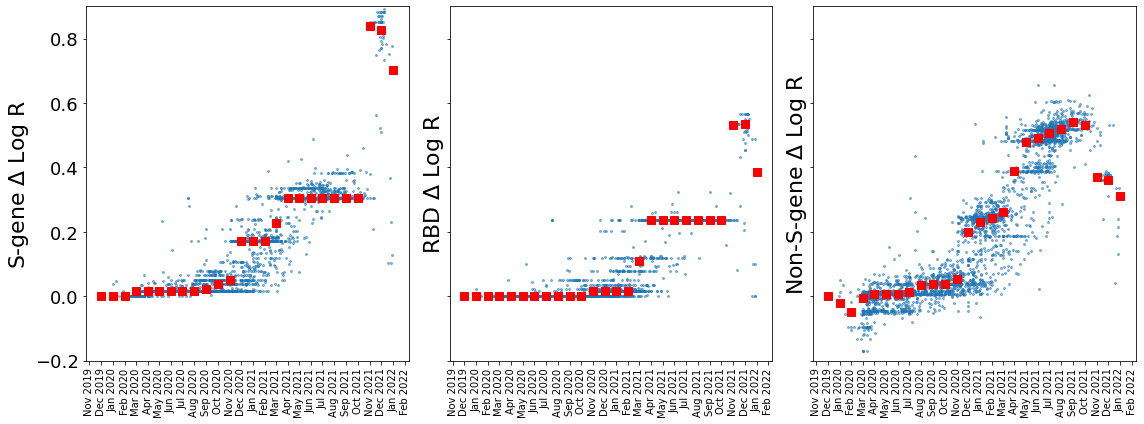

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

print("y-mins:", min(S_pred), min(rbd_pred), min(full_pred - S_pred))
print("y-maxes:", max(S_pred), max(rbd_pred), max(full_pred - S_pred))

labelfontsize = 22

ax0.plot(dates, S_pred, lw=0.0, ls=None, marker='.', alpha=0.5, markersize=4)
months, values = aggregate_by_month(S_pred, dates)
ax0.plot(months, values, lw=0.0, ls=None, color='red', marker='s', markersize=8)
ax0.set_ylabel("S-gene $\\Delta$ Log R", fontsize=labelfontsize)

ax1.plot(dates, rbd_pred, lw=0.0, ls=None, marker='.', alpha=0.5, markersize=4)
months, values = aggregate_by_month(rbd_pred, dates)
ax1.plot(months, values, lw=0.0, ls=None, color='red', marker='s', markersize=8)
ax1.set_ylabel("RBD $\\Delta$ Log R", fontsize=labelfontsize)

ax2.plot(dates, full_pred - S_pred, lw=0.0, ls=None, marker='.', alpha=0.5, markersize=4)
months, values = aggregate_by_month(full_pred - S_pred, dates)
ax2.plot(months, values, lw=0.0, ls=None, color='red', marker='s', markersize=8)
ax2.set_ylabel("Non-S-gene $\\Delta$ Log R", fontsize=labelfontsize)

for ax in (ax0, ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_ylim(-0.2, 0.9)
    
    for label in ax.get_xticklabels():
        label.set_rotation(90)

ax0.tick_params(axis='y', which='major', labelsize=18)

plt.tight_layout()
plt.savefig('delta_logR_breakdown.png')
plt.show()

### examine b.1.1 heterogeneity

In [5]:
lineage_to_clades = defaultdict(list)
for k, v in clade_to_lineage.items():
    lineage_to_clades[v].append(k)
clade_ids = {clade: i for i, clade in enumerate(clades)}

In [6]:
b11_clades = lineage_to_clades['B.1.1']

In [7]:
b11 = []
for clade in b11_clades:
    b11.append( (birthdays[clade], full_pred[clade_ids[clade]] ) )

In [8]:
sorted(b11)

[(datetime.datetime(2020, 2, 25, 0, 0), 0.021894244),
 (datetime.datetime(2020, 2, 29, 0, 0), 0.021894244),
 (datetime.datetime(2020, 3, 1, 0, 0), 0.009130241),
 (datetime.datetime(2020, 3, 1, 0, 0), 0.021894244),
 (datetime.datetime(2020, 3, 11, 0, 0), 0.008361165),
 (datetime.datetime(2020, 3, 15, 0, 0), 0.041107744),
 (datetime.datetime(2020, 3, 18, 0, 0), 0.065864176),
 (datetime.datetime(2020, 4, 1, 0, 0), 0.060953386),
 (datetime.datetime(2020, 4, 7, 0, 0), 0.060843382),
 (datetime.datetime(2020, 4, 20, 0, 0), 0.047614),
 (datetime.datetime(2020, 5, 12, 0, 0), 0.051898863),
 (datetime.datetime(2020, 6, 3, 0, 0), 0.27326488),
 (datetime.datetime(2020, 7, 27, 0, 0), 0.13485777),
 (datetime.datetime(2020, 10, 24, 0, 0), 0.07449934),
 (datetime.datetime(2020, 12, 15, 0, 0), 0.041920174),
 (datetime.datetime(2020, 12, 21, 0, 0), 0.14655082),
 (datetime.datetime(2021, 1, 14, 0, 0), 0.07776664),
 (datetime.datetime(2021, 1, 28, 0, 0), 0.07776664),
 (datetime.datetime(2021, 2, 2, 0, 0), 